In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [35]:
# help(nd.random)
ndX = nd.random.normal(scale=1, shape=(1000, 2))
fTrueW = nd.array([2, -3.4])
fTrueB = 4.2
ndTrueY = nd.dot(ndX, nd.transpose(fW1)) + fB
ndTrueY += nd.random.normal(scale=0.01, shape=ndY.shape)
print(ndTrueY.shape)
# print(data_x)

(1000L,)


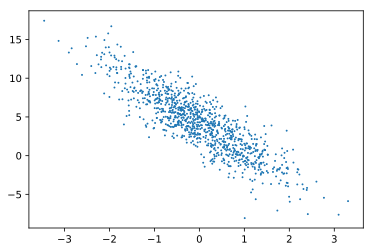

In [36]:
# help(display.display(ndY))
display.set_matplotlib_formats("svg")
plt.scatter(ndX[:, 1].asnumpy(), ndTrueY.asnumpy(),1)

In [59]:
def get_batch(ndX, ndY, iBatchSize=10):
    """Get batch size data
    """
    iNum = ndX.shape[0]
    lIndice = list(range(iNum))
    random.shuffle(lIndice)
    for iIndex in xrange(0, iNum, iBatchSize):
        ndJ = nd.array(lIndice[iIndex: min(iIndex+iBatchSize, iNum)])
        yield ndX.take(ndJ), ndY.take(ndJ)       

In [60]:
def loss(ndTrueY, ndPredY):
    """Compute loss
    """
    return nd.sum((ndTrueY - ndPredY).square())

In [61]:
ndTrueY = nd.random.normal(0, 1, shape=(10))
ndPredY = nd.random.normal(0, 1, shape=(10))
print(loss(ndTrueY, ndPredY))


[33.26627]
<NDArray 1 @cpu(0)>


In [69]:
def forward(ndX, ndW, ndB):
    return nd.dot(ndX, ndW) + ndB


In [70]:
def sgd(ndParam, fLR, iBatchSize):
    for param in ndParam:
        param[:] = param - fLR * param.grad / iBatchSize 
    
    

In [71]:
ndPredW = nd.random.normal(0, 10, shape=[2])
ndPredB = nd.random.normal(0, 10, shape=[1])
ndPredW.attach_grad()
ndPredB.attach_grad()

In [76]:
def run_model(ndX, ndY):
    ndPredW = nd.random.normal(0, 10, shape=[2])
    ndPredB = nd.random.normal(0, 10, shape=[1])
    for ndBatchX, ndBatchY in get_batch(ndX, ndY):
        ndPredY = forward(ndBatchX, ndPredW, ndPredB)
        sgd([ndPredW, ndPredB], 0.1, 10)

In [77]:
run_model(ndX, ndY)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'